In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

In [2]:
df = pd.read_csv("../summary_data/150bp/all_tools_TRB.csv")
df

,Sample,CDR3,nReads_TCR,nReads_MIXCR,nReads_IMREP,nReads_TRUST4,sample_type,total_reads_TCR,total_reads_MIXCR,total_reads_IMREP,total_reads_TRUST4,frequency_TCR,frequency_MIXCR,frequency_IMREP,frequency_TRUST4,clonal_type
0,MP-11-28-12RNA_S2,CASSETGAETQYF,4.0,0.0,0.0,0.0,PBMC,18617.0,55.0,111.0,186.0,0.000215,0.0,0.0,0.000000,polyclonal
1,MP-11-28-12RNA_S2,CASSFETVNNSPLHF,2.0,0.0,0.0,0.0,PBMC,18617.0,55.0,111.0,186.0,0.000107,0.0,0.0,0.000000,polyclonal
2,MP-11-28-12RNA_S2,CAISESGGSSYNEQFF,2.0,0.0,0.0,0.0,PBMC,18617.0,55.0,111.0,186.0,0.000107,0.0,0.0,0.000000,polyclonal
3,MP-11-28-12RNA_S2,CASSVSYRGRFGYTF,4.0,0.0,0.0,0.0,PBMC,18617.0,55.0,111.0,186.0,0.000215,0.0,0.0,0.000000,polyclonal
4,MP-11-28-12RNA_S2,CASTRWGDNEQFF,2.0,0.0,0.0,0.0,PBMC,18617.0,55.0,111.0,186.0,0.000107,0.0,0.0,0.000000,polyclonal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151597,SAR-11-14-12RNA_S1,CASSEWGPGTGDSYEQYF,0.0,0.0,0.0,3.0,PBMC,104779.0,158.0,1354.0,2006.0,0.000000,0.0,0.0,0.001496,polyclonal
151598,SAR-11-14-12RNA_S1,CASSVPGQGSSMYF,0.0,0.0,0.0,2.0,PBMC,104779.0,158.0,1354.0,2006.0,0.000000,0.0,0.0,0.000997,polyclonal
151599,SAR-11-14-12RNA_S1,CASSPRGDEQFF,0.0,0.0,0.0,2.0,PBMC,104779.0,158.0,1354.0,2006.0,0.000000,0.0,0.0,0.000997,polyclonal
151600,SAR-11-14-12RNA_S1,CASSLASVLQPQHF,0.0,0.0,0.0,2.0,PBMC,104779.0,158.0,1354.0,2006.0,0.000000,0.0,0.0,0.000997,polyclonal


Compare the clonotype frequencies across tools samples

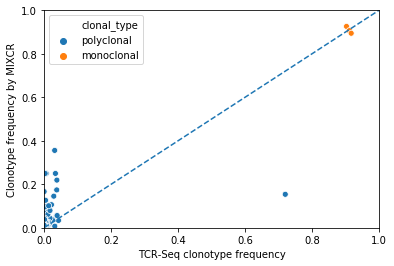

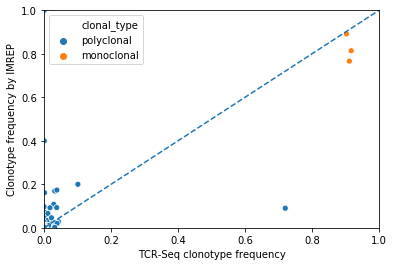

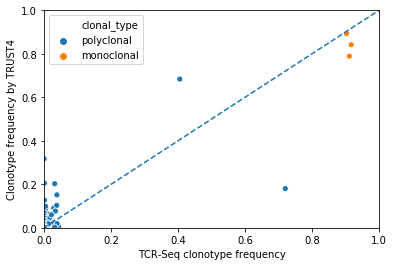

In [7]:
# MIXCR
df_MIXCR = df[['Sample','sample_type','clonal_type','CDR3','frequency_TCR','frequency_MIXCR']]
df_MIXCR = df_MIXCR.loc[(df_MIXCR['frequency_TCR'] != 0) & (df_MIXCR['frequency_MIXCR'] != 0)]

# IMReP
df_IMREP = df[['Sample','sample_type','clonal_type','CDR3','frequency_TCR','frequency_IMREP']]
df_IMREP = df_IMREP.loc[(df_IMREP['frequency_TCR'] != 0) & (df_IMREP['frequency_IMREP'] != 0)]

# TRUST4
df_TRUST4 = df[['Sample','sample_type','clonal_type','CDR3','frequency_TCR','frequency_TRUST4']]
df_TRUST4 = df_TRUST4.loc[(df_TRUST4['frequency_TCR'] != 0) & (df_TRUST4['frequency_TRUST4'] != 0)]

ax = sns.scatterplot(x = 'frequency_TCR', y = 'frequency_MIXCR', hue='clonal_type', data = df_MIXCR)
ax = sns.lineplot(x=range(0,2),y=range(0,2))
ax.lines[0].set_linestyle("--")
ax.set_xlabel("TCR-Seq clonotype frequency")
ax.set_ylabel("Clonotype frequency by MIXCR")
ax.set(xlim = (0, 1), ylim = (0, 1))
ax.grid(False)
plt.show()

ax = sns.scatterplot(x = 'frequency_TCR', y = 'frequency_IMREP', hue='clonal_type', data = df_IMREP)
ax = sns.lineplot(x=range(0,2),y=range(0,2))
ax.lines[0].set_linestyle("--")
ax.set_xlabel("TCR-Seq clonotype frequency")
ax.set_ylabel("Clonotype frequency by IMREP")
ax.set(xlim = (0, 1), ylim = (0, 1))
ax.grid(False)
plt.show()

ax = sns.scatterplot(x = 'frequency_TCR', y = 'frequency_TRUST4', hue='clonal_type', data = df_TRUST4)
ax = sns.lineplot(x=range(0,2),y=range(0,2))
ax.lines[0].set_linestyle("--")
ax.set_xlabel("TCR-Seq clonotype frequency")
ax.set_ylabel("Clonotype frequency by TRUST4")
ax.set(xlim = (0, 1), ylim = (0, 1))
ax.grid(False)
plt.show()

In [8]:
# Calculate the Pearson correlation for all samples

print('MIXCR Pearson correlation cofficient:' + str(stats.pearsonr(df_MIXCR['frequency_TCR'], df_MIXCR['frequency_MIXCR'])))
print('IMREP Pearson correlation cofficient:' + str(stats.pearsonr(df_IMREP['frequency_TCR'], df_IMREP['frequency_IMREP'])))
print('TRUST4 Pearson correlation cofficient:' + str(stats.pearsonr(df_TRUST4['frequency_TCR'], df_TRUST4['frequency_TRUST4'])))

MIXCR Pearson correlation cofficient:(0.8555915514348602, 0.0)
IMREP Pearson correlation cofficient:(0.7267792712292479, 0.0)
TRUST4 Pearson correlation cofficient:(0.8829677964078044, 0.0)


In [9]:
# Calculate the Pearson correlation in monoclonal samples

monoclonal_MIXCR = df_MIXCR.loc[((df_MIXCR['clonal_type'] == 'monoclonal'))]
monoclonal_IMREP = df_IMREP.loc[((df_IMREP['clonal_type'] == 'monoclonal'))]
monoclonal_TRUST4 = df_TRUST4.loc[((df_TRUST4['clonal_type'] == 'monoclonal'))]

print('MIXCR Pearson correlation cofficient:' + str(stats.pearsonr(monoclonal_MIXCR['frequency_TCR'], monoclonal_MIXCR['frequency_MIXCR'])))
print('IMREP Pearson correlation cofficient:' + str(stats.pearsonr(monoclonal_IMREP['frequency_TCR'], monoclonal_IMREP['frequency_IMREP'])))
print('TRUST4 Pearson correlation cofficient:' + str(stats.pearsonr(monoclonal_TRUST4['frequency_TCR'], monoclonal_TRUST4['frequency_TRUST4'])))

MIXCR Pearson correlation cofficient:(0.9997837477663104, 0.0)
IMREP Pearson correlation cofficient:(0.9977249763700025, 0.0)
TRUST4 Pearson correlation cofficient:(0.9984995931162889, 0.0)


In [10]:
# Calculate the Pearson correlation in polyclonal samples

polyclonal_MIXCR = df_MIXCR.loc[((df_MIXCR['clonal_type'] == 'polyclonal'))]
polyclonal_IMREP = df_IMREP.loc[((df_IMREP['clonal_type'] == 'polyclonal'))]
polyclonal_TRUST4 = df_TRUST4.loc[((df_TRUST4['clonal_type'] == 'polyclonal'))]

print('MIXCR Pearson correlation cofficient:' + str(stats.pearsonr(polyclonal_MIXCR['frequency_TCR'], polyclonal_MIXCR['frequency_MIXCR'])))
print('IMREP Pearson correlation cofficient:' + str(stats.pearsonr(polyclonal_IMREP['frequency_TCR'], polyclonal_IMREP['frequency_IMREP'])))
print('TRUST4 Pearson correlation cofficient:' + str(stats.pearsonr(polyclonal_TRUST4['frequency_TCR'], polyclonal_TRUST4['frequency_TRUST4'])))

MIXCR Pearson correlation cofficient:(0.2626676455587513, 6.278980696226677e-08)
IMREP Pearson correlation cofficient:(0.12120419610661844, 0.0002968593185312617)
TRUST4 Pearson correlation cofficient:(0.5575343420667965, 1.5786271853838683e-96)
